In [7]:
import sys
print(sys.executable)


c:\Users\tahao\AppData\Local\Programs\Python\Python39\python.exe


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [9]:
# Load data
df = pd.read_csv("C:/Users/tahao/Downloads/Task2/customer_booking.csv", encoding="ISO-8859-1")


In [10]:
# Convert flight_day to numerical values
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)

In [13]:
# One-hot encode categorical variables
cat_vars = ['sales_channel', 'trip_type', 'route', 'booking_origin']
encoded_feature_names = []
for cat_var, unique_values in zip(cat_vars, enc.categories_):
    encoded_feature_names.extend([f'{cat_var}_{val}' for val in unique_values])

encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Normalize numerical features
num_vars = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration', 'flight_day']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_vars])
scaled_df = pd.DataFrame(scaled_features, columns=num_vars)

# Combine preprocessed categorical and numerical features
df_preprocessed = pd.concat([scaled_df, encoded_df], axis=1)

# Add interaction feature
df_preprocessed['extra_services_sum'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']


In [14]:
# Split data into training and testing sets
X = df_preprocessed
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Train RandomForest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Fine-tune hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

Cross-validated accuracy: 0.85125
Cross-validated precision: 0.527645626280737
Cross-validated recall: 0.08269377258826802
Cross-validated F1 score: 0.14289816558034601
Test set accuracy: 0.8558
Test set precision: 0.5863636363636363
Test set recall: 0.08716216216216216
Test set F1 score: 0.1517647058823529


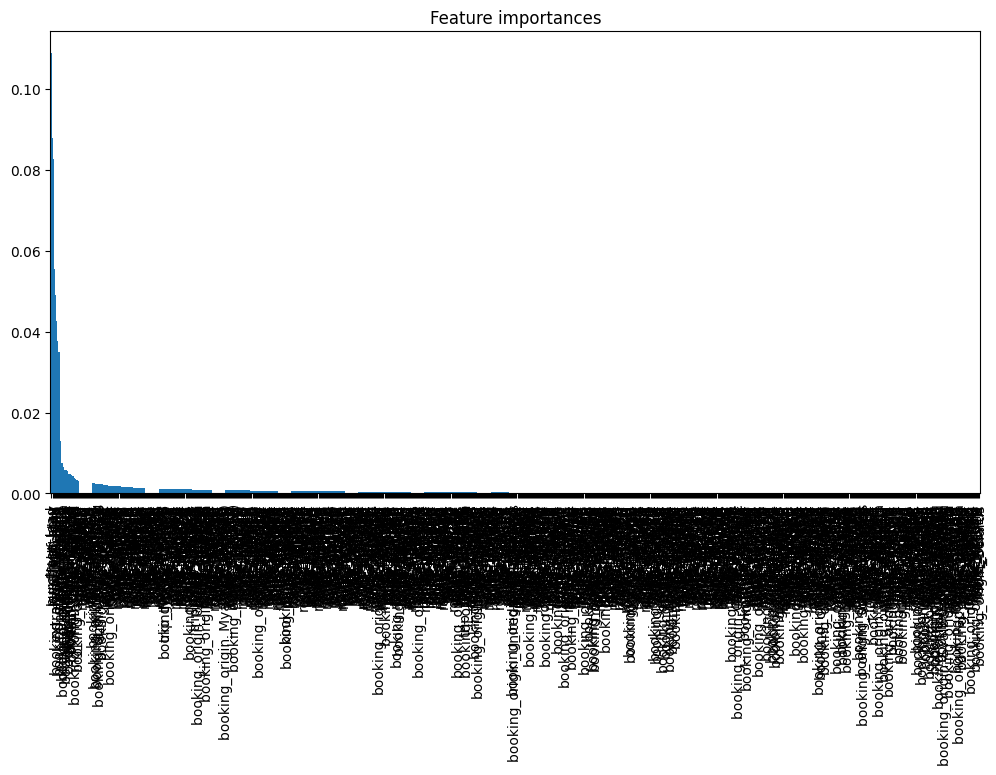

In [16]:
# Cross-validate and output evaluation metrics
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Cross-validated accuracy:", np.mean(cv_scores))
print("Cross-validated precision:", np.mean(cross_val_score(best_rf, X_train, y_train, cv=5, scoring='precision')))
print("Cross-validated recall:", np.mean(cross_val_score(best_rf, X_train, y_train, cv=5, scoring='recall')))
print("Cross-validated F1 score:", np.mean(cross_val_score(best_rf, X_train, y_train, cv=5, scoring='f1')))

# Test model on the test set and output evaluation metrics
y_pred = best_rf.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Test set precision:", precision_score(y_test, y_pred))
print("Test set recall:", recall_score(y_test, y_pred))
print("Test set F1 score:", f1_score(y_test, y_pred))

# Visualize feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
columns = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

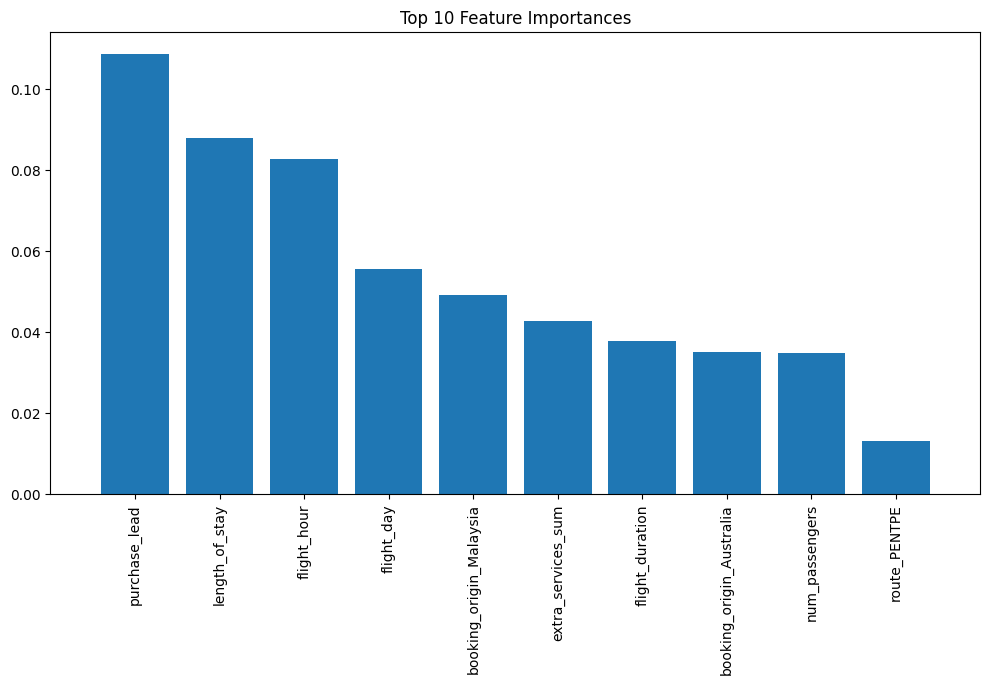

In [18]:
# Extract top 10 features
top_n = 10
top_indices = indices[:top_n]
top_columns = columns[top_indices]
top_importances = importances[top_indices]

# Visualize top 10 feature importances
plt.figure(figsize=(12, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(top_n), top_importances, align="center")
plt.xticks(range(top_n), top_columns, rotation=90)
plt.xlim([-1, top_n])
plt.show()
